# Лабораторная работа №1 

## Морозова Маргарита, РИ-481223

## Вариант 12

In [5]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot 
from statsmodels.graphics.tsaplots import plot_acf
import h5py
from scipy.stats import skew
from scipy.stats import kurtosis
%matplotlib inline

In [6]:
X = rand.randn(10000)
t = np.linspace(3, 5, num = 10000)

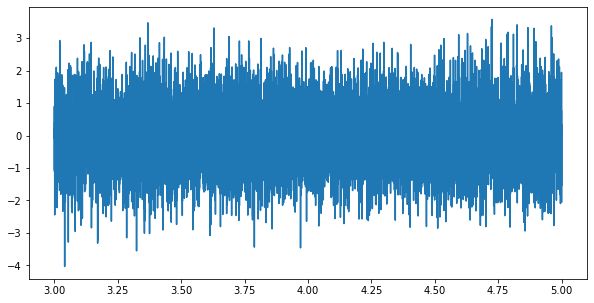

In [7]:
plt.figure(figsize= (10, 5)) 
plt.plot(t, X)

### Находим мат. ожидание данного ВР двумя способами:

In [8]:
M = np.mean(X)
print (M)

0.006641945148642628


In [9]:
M = 1/10000 * np.sum(X)
print (M)

0.006641945148642628


Значения мат. ожидания, полученные двумя способами, совпадают.

### Находим дисперсию данного ВР двумя способами:

In [10]:
D = np.var(X)
print (D)

0.9709284851980304


In [11]:
D = 1/10000 * np.sum(pow((X - M), 2))
print (D)

0.9709284851980305


Значения дисперсии, полученные двумя способами, совпадают.

### Находим ассиметрию данного ВР двумя способами:

In [12]:
A = skew(X)
print (A)

0.008501722332225977


In [13]:
A =  np.sum(pow((X - M), 3)) / (10000 * pow (D, 1.5))
print (A)

0.008501722332225974


Значения ассиметри, полученные двумя способами, совпадают (с небольшой погрешностью).

### Находим эксцесс данного ВР двумя способами:

In [14]:
E = kurtosis(X, fisher = False)
print (E)

3.0609936206589388


In [15]:
E = np.sum(pow((X - M), 4)) / (10000 * pow (D, 2))
print (E)

3.060993620658938


Значения эксцесса, полученные двумя способами, совпадают (с небольшой погрешностью).

### Посторение оценки выборочной автокорреляции ВР несколькими способами:

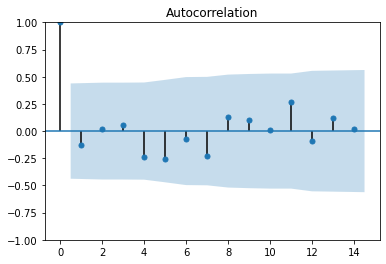

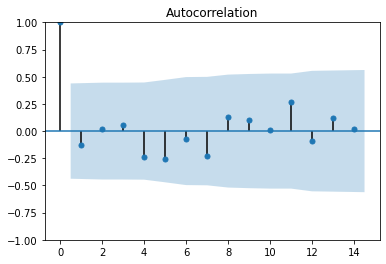

In [16]:
plot_acf(X[0:20])

In [31]:
X_cor = (np.correlate(X[0:21], X[0:21], mode = 'full'))

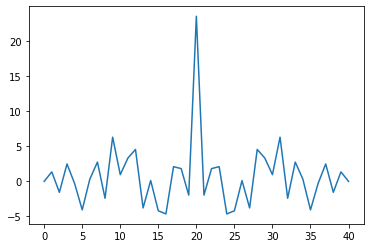

In [33]:
l = [i for i in range(41)]
plt.plot(l, X_cor)

In [34]:
def Sum(k, i, X, Y, l):
    sum = 0
    for j in range(k):
        sum += (X[j] * Y[j+l])**i
    return sum

In [35]:
N = 10000

In [37]:
def autocorr(X, l):
    N = len(X)
    r = ((N - l) * Sum(N - l, 1, X, X, l) - Sum(N - l, 1, X, np.ones(N), 0) * Sum(N - l, 1, np.ones(N), X, l)) / ( ( (N - l) * Sum(N - l, 2, X, np.ones(N), 0) - (Sum(N - l, 1, X, np.ones(N), 0))**2 )**0.5 * ( (N - l) * Sum(N - l, 2, np.ones(N), X, l) - (Sum(N - l, 1, np.ones(N), X, l))**2 )**0.5 )
    return r

In [41]:
array = [] 
for l in range(20):
    array.append(autocorr(X, l))    

In [42]:
print (array)

[1.0000000000000002, -0.008468510107758858, 0.026359088220853456, -0.00801198130590372, -0.022368197446472598, 0.014955012723893699, -0.007185680267438552, 0.009319578874511925, 0.001477746671896968, -0.014139205956595123, -9.910454123757706e-05, 0.003967776224624844, 0.01044067940384572, 0.003709033213549781, 0.0006811830083862763, 0.00207630357818028, -0.001262090862369792, -0.010412753622470183, 0.0015137703886228852, 0.000198823966514378]


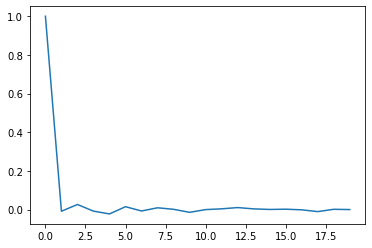

In [44]:
plt.plot(array)

### Функция:

In [70]:
def analysVR (X):
    M = np.mean(X)
    D = np.var(X)
    A = skew(X)
    E = kurtosis(X, fisher = False)
    print ('Мат. ожидание:', M)
    print ('Дисперсия:', D)
    print ('Ассиметрия:', A)
    print ('Эксцесс:', E)
    plot_acf(X[0:20])

###  Работа с mat-файлом, 12 Вариант

In [77]:
Xmat = h5py.File(r'C:\Users\Морозова Маргарита\Downloads\12.mat') 
Xmat = Xmat.get('z12') 
Xmat = np.array(Xmat)

Мат. ожидание: 0.0012860710384378082
Дисперсия: 0.9952239990699998
Ассиметрия: [0.31293065]
Эксцесс: [2.40643843]


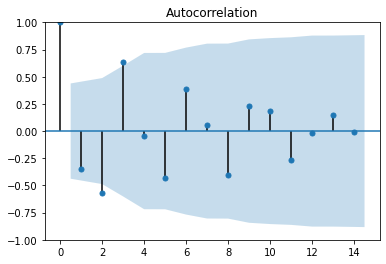

In [78]:
analysVR (Xmat)